[View in Colaboratory](https://colab.research.google.com/github/elangokpm/Work-Area/blob/master/Airfoil_Self_Noise.ipynb)

   **Airfoil Self-Noise Data Set **


The NASA data set comprises different size NACA 0012 airfoils at various wind tunnel speeds and angles of attack. The span of the airfoil and the observer position were the same in all of the experiments.


**Attribute Information:**

This problem has the following inputs: 
1. Frequency, in Hertzs. 
2. Angle of attack, in degrees. 
3. Chord length, in meters. 
4. Free-stream velocity, in meters per second. 
5. Suction side displacement thickness, in meters. 

The only output is: 
6. Scaled sound pressure level, in decibels.


**Load data:**

The dataset is available in UCI website. 
https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise#

In [2]:
import pandas as pd

df_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat',sep='\t',header=None)
df_data.columns = ['frequency','angle','chord_length','free_stream','suction_side','sound_pressure']
df_data.head()

,frequency,angle,chord_length,free_stream,suction_side,sound_pressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [3]:
df_data.describe()

,frequency,angle,chord_length,free_stream,suction_side,sound_pressure
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


In [4]:
#handling missing data
df_data.isnull().sum()

frequency         0
angle             0
chord_length      0
free_stream       0
suction_side      0
sound_pressure    0
dtype: int64

There is no missing value in dataset.

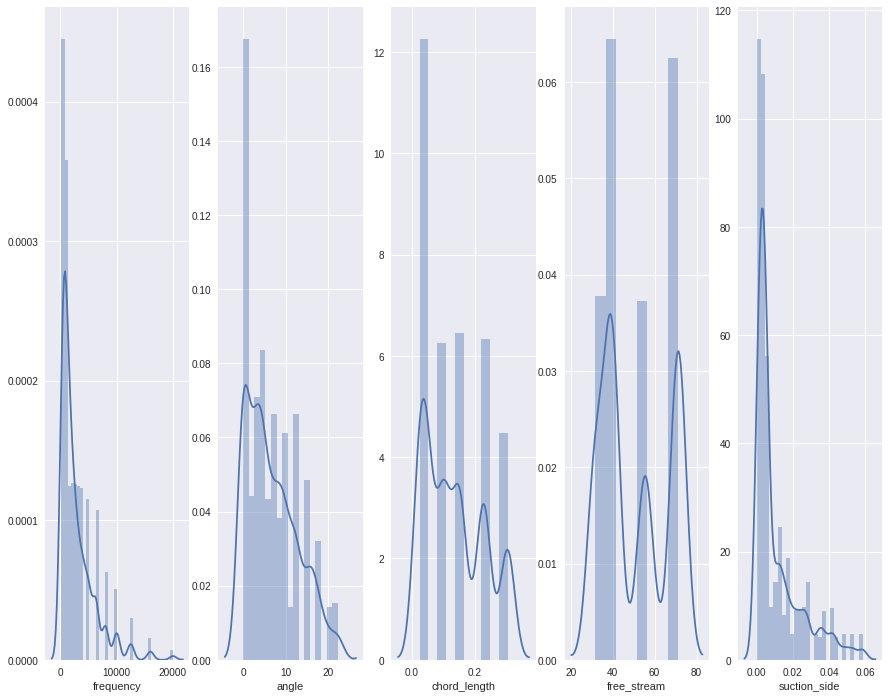

In [11]:
#see how value is distributed
import seaborn as sns
fig,axs = sns.plt.subplots(ncols=5,figsize=(15,12))
sns.distplot(df_data['frequency'],ax = axs[0])
sns.distplot(df_data['angle'],ax = axs[1])
sns.distplot(df_data['chord_length'],ax = axs[2])
sns.distplot(df_data['free_stream'],ax = axs[3])
sns.distplot(df_data['suction_side'],ax = axs[4])

All the features are not normally distributed. Scale all the features.



In [64]:
df_data['free_stream'].value_counts()
df_data['free_stream'].map({39.6:1,71.3:2,31.7:3,55.5:4})

0       2
1       2
2       2
3       2
4       2
5       2
6       2
7       2
8       2
9       2
10      2
11      2
12      2
13      2
14      4
15      4
16      4
17      4
18      4
19      4
20      4
21      4
22      4
23      4
24      4
25      4
26      4
27      4
28      4
29      1
       ..
1473    2
1474    2
1475    2
1476    2
1477    2
1478    2
1479    2
1480    2
1481    2
1482    2
1483    2
1484    2
1485    2
1486    2
1487    1
1488    1
1489    1
1490    1
1491    1
1492    1
1493    1
1494    1
1495    1
1496    1
1497    1
1498    1
1499    1
1500    1
1501    1
1502    1
Name: free_stream, Length: 1503, dtype: int64

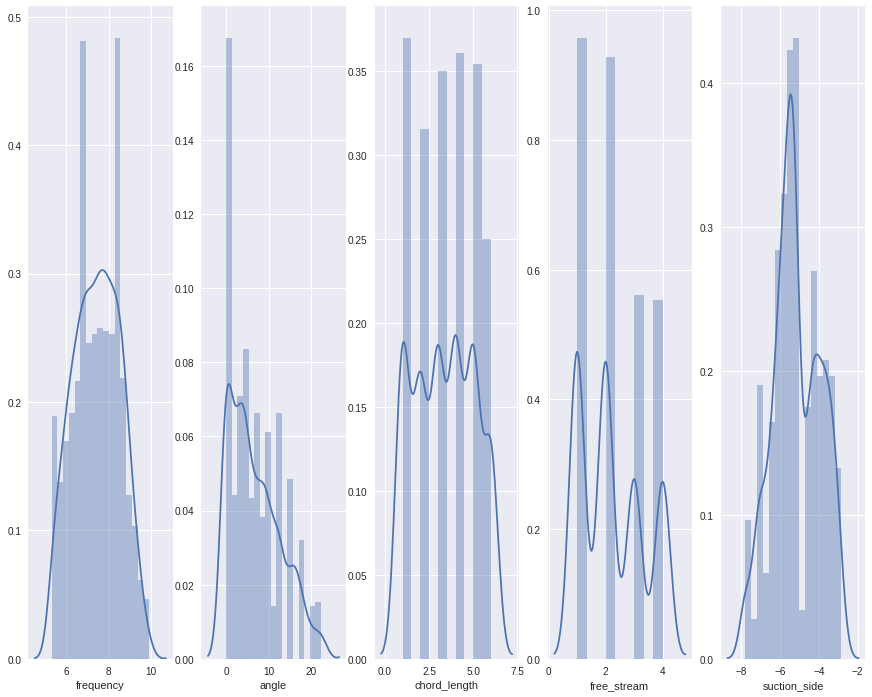

In [65]:
import numpy as np
fig,axs = sns.plt.subplots(ncols=5,figsize=(15,12))
sns.distplot(np.log(df_data['frequency']),ax = axs[0])
sns.distplot(df_data['angle'],ax = axs[1])
sns.distplot(df_data['chord_length'].map({0.0254:1,0.0508:2,0.1016:3,0.1524:4,0.2286:5,0.3048:6}),ax = axs[2])
sns.distplot(df_data['free_stream'].map({39.6:1,71.3:2,31.7:3,55.5:4}),ax = axs[3])
sns.distplot(np.log(df_data['suction_side']),ax = axs[4])

In [0]:
predicted_features = ['frequency','angle','chord_length','free_stream','suction_side']
df_features = pd.DataFrame(columns=predicted_features)
df_features['frequency'] = np.log(df_data['frequency'])
df_features['angle'] = df_data['angle']
df_features['chord_length'] = df_data['chord_length'].map({0.0254:1,0.0508:2,0.1016:3,0.1524:4,0.2286:5,0.3048:6})
df_features['free_stream'] = df_data['free_stream'].map({39.6:1,71.3:2,31.7:3,55.5:4})
df_features['suction_side'] = np.log(df_data['suction_side'])

In [71]:
df_features.describe()

,frequency,angle,chord_length,free_stream,suction_side
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,7.425554,6.782302,3.381903,2.236194,-5.168823
std,1.084833,5.918128,1.663581,1.090191,1.211918
min,5.298317,0.000000,1.000000,1.000000,-7.822342
25%,6.684612,2.000000,2.000000,1.000000,-5.977518
50%,7.377759,5.400000,3.000000,2.000000,-5.306872
75%,8.294050,9.900000,5.000000,3.000000,-4.162606
max,9.903488,22.200000,6.000000,4.000000,-2.840246


In [72]:
df_features.isnull().sum()

frequency       0
angle           0
chord_length    0
free_stream     0
suction_side    0
dtype: int64

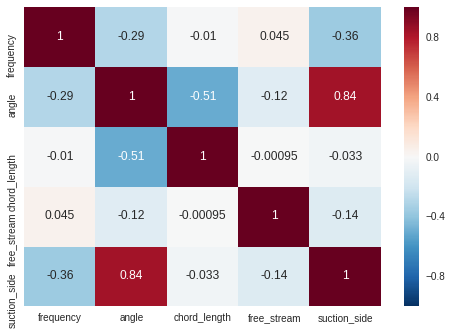

In [73]:
#find the correlation between variables
sns.heatmap(df_features.corr(),annot=True)

In [0]:
#features and target
X = df_features
y = df_data['sound_pressure']

#split train test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
reg = LinearRegression()
reg.fit(X_train,y_train)
print(reg.score(X_test,y_test))

0.430979373271146


The model is suffering bias, try to add polynomial features.

In [90]:
#create polynomial features
from sklearn.preprocessing import PolynomialFeatures
X_train_modified = PolynomialFeatures(6).fit_transform(X_train)
X_test_modified = PolynomialFeatures(6).fit_transform(X_test)
reg = LinearRegression()
reg.fit(X_train_modified,y_train)
print(reg.score(X_test_modified,y_test))

0.9106759912667429


Added polynomial features, it gives good result